In [14]:
import lightkurve
import matplotlib.pyplot as plt
from lightkurve import KeplerTargetPixelFile
tpf = KeplerTargetPixelFile("https://archive.stsci.edu/pub/kepler/target_pixel_files/0069/006922244/kplr006922244-2010078095331_lpd-targ.fits.gz")
%matplotlib inline

In [16]:
from lightkurve import search_targetpixelfile
tpf = search_targetpixelfile('Kepler-32 b', quarter=4).download()

In [17]:
tpf.mission

'Kepler'

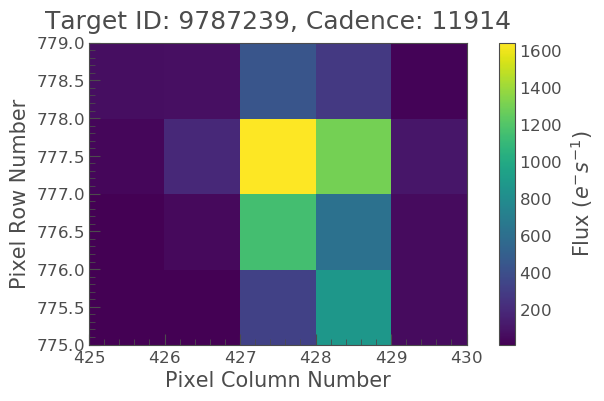

In [18]:
tpf.plot(frame=0)

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True, False],
       [False, False, False, False, False]])

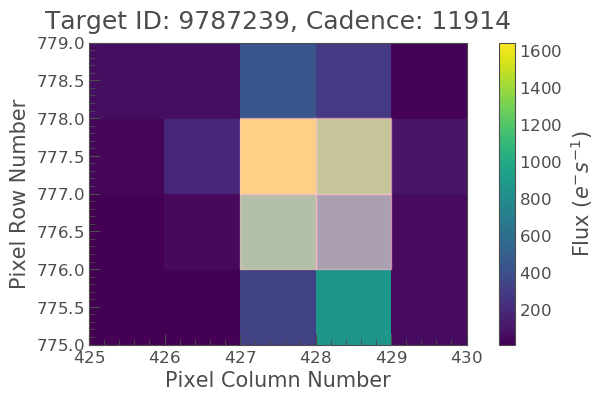

In [19]:
tpf.plot(aperture_mask=tpf.pipeline_mask)
tpf.pipeline_mask

In [20]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

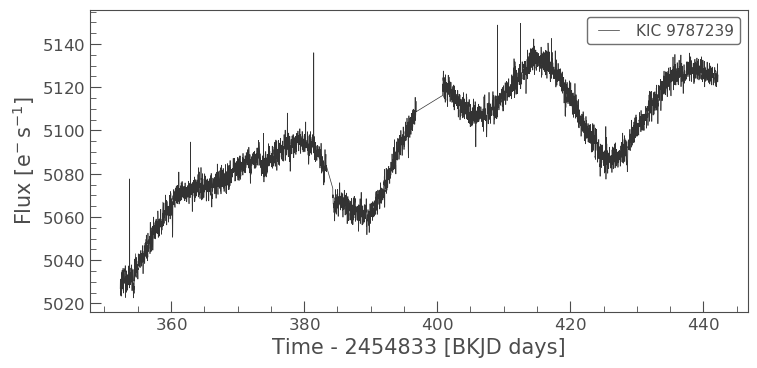

In [21]:
lc.plot()

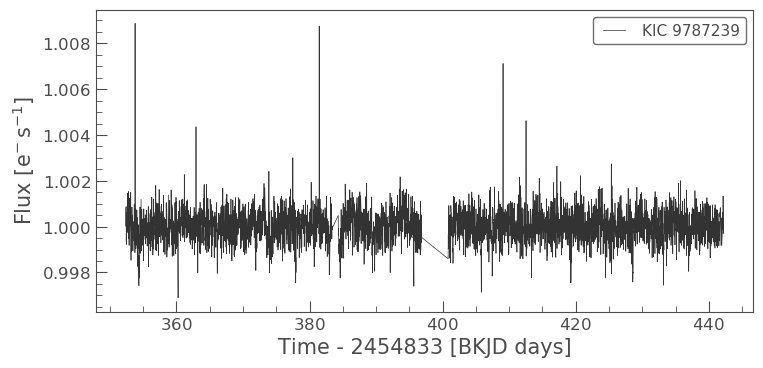

In [22]:
flat_lc=lc.flatten(window_length=401)
flat_lc.plot();

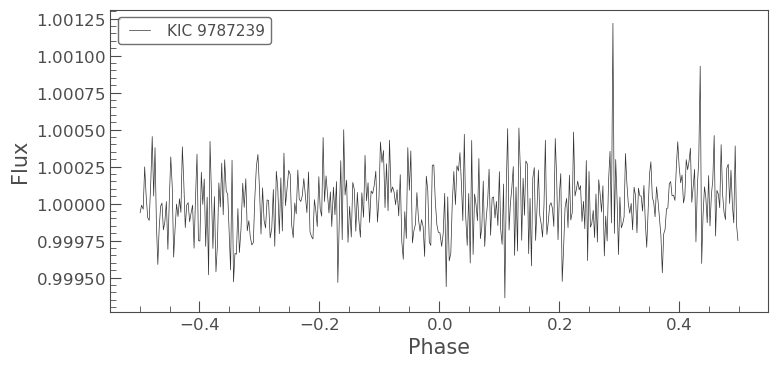

In [23]:
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot();

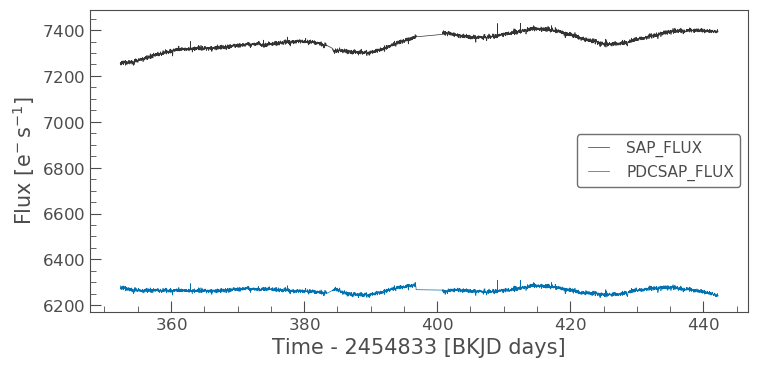

In [26]:
##### light curve file as opposed to target pixel file
from lightkurve import search_lightcurvefile
lcf = search_lightcurvefile('Kepler-32 b', quarter=4).download()
lcf.plot()

In [27]:
pdcsap = lcf.PDCSAP_FLUX
sapflux = lcf.SAP_FLUX

In [28]:
lcf

KeplerLightCurveFile(ID: 9787239)

229.02220974328546

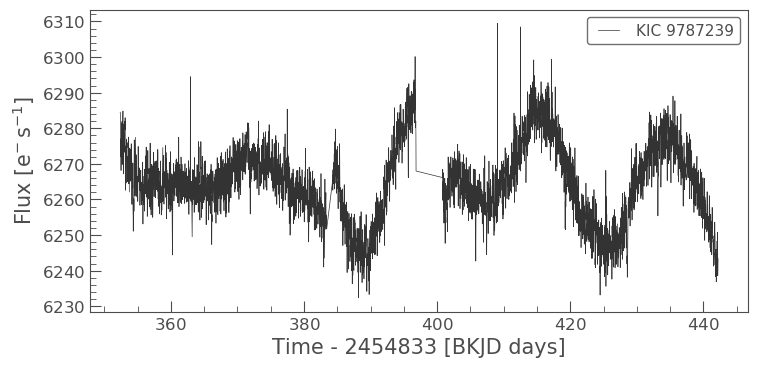

In [31]:
pdcsap.plot()
pdcsap.estimate_cdpp()

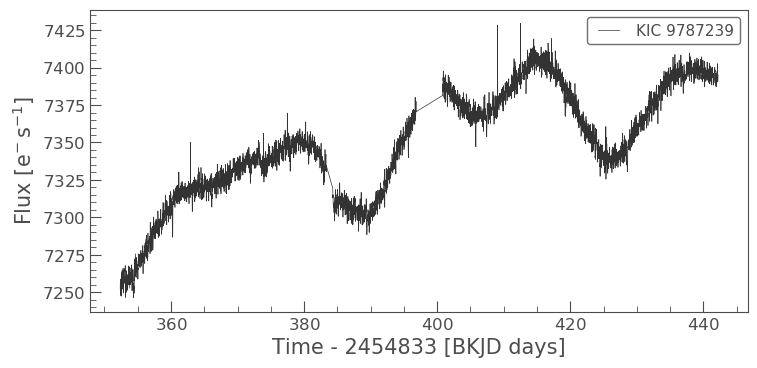

In [32]:
sapflux.plot()

In [41]:
###### periodogram 
from lightkurve import search_lightcurvefile
lc = search_lightcurvefile('Kepler-32 b', quarter=4).download().PDCSAP_FLUX.remove_nans()

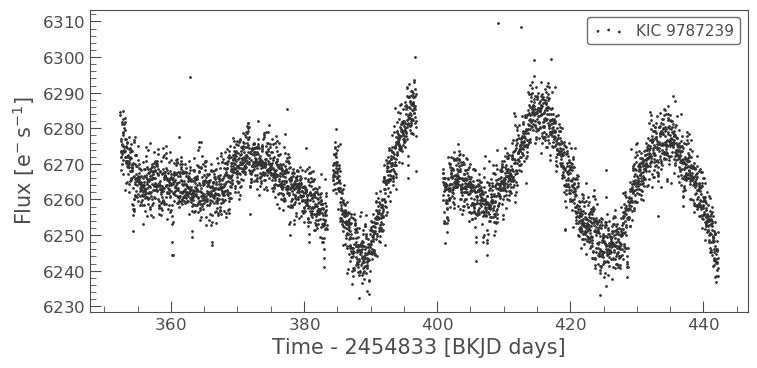

In [42]:
lc.scatter()

In [43]:
pg=lc.to_periodogram(oversample_factor=1)

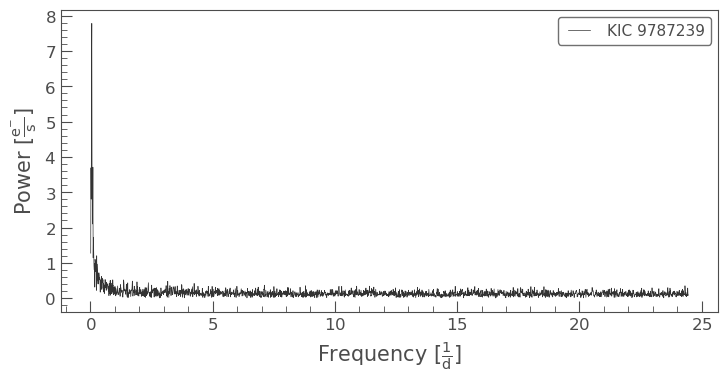

In [44]:
pg.plot()

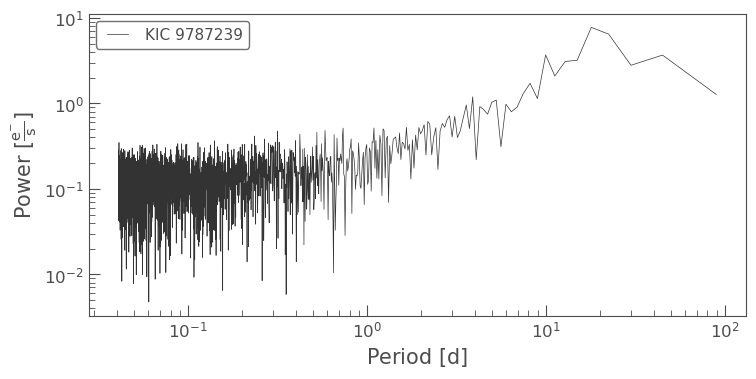

In [45]:
pg.plot(view='period', scale='log');


In [48]:
pg.period
pg.power
pg.period_at_max_power

<Quantity 17.96099273 d>

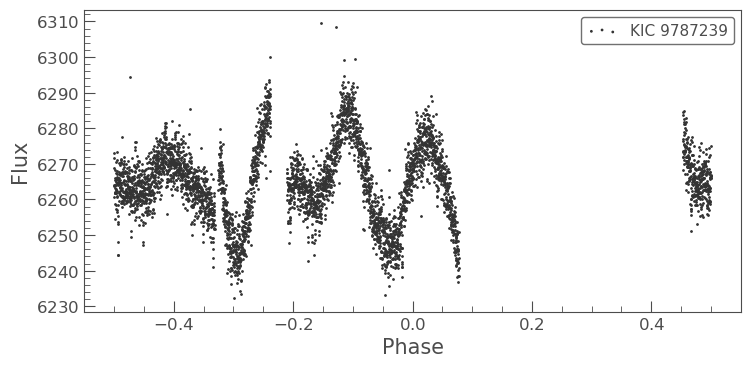

In [57]:
lc.fold(8*pg.period_at_max_power).scatter();

In [65]:
import astropy.units as u
pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
pg.period_at_max_power

<Quantity 1.09069375 d>

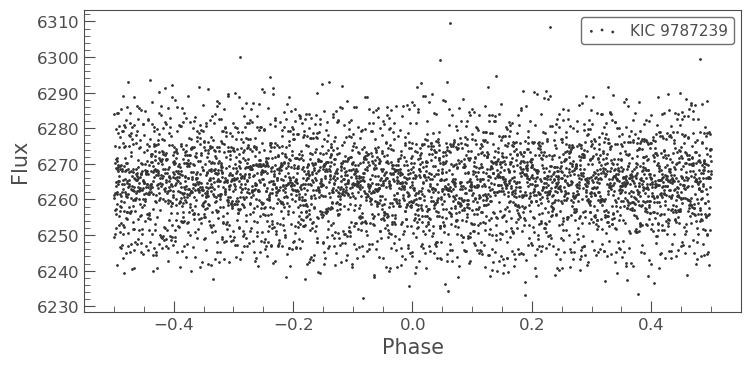

In [66]:
lc.fold(pg.period_at_max_power).scatter();